In [1]:
import pandas as pd

# Read the dataset
data = pd.read_csv('df1.csv')  # Replace 'updatepreg.csv' with the actual file path

# Print unique elements in each column
for column in data.columns:
    unique_elements = data[column].unique()
    print(f"Unique elements in '{column}':")
    print(unique_elements)
    print()

Unique elements in 'age':
[12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 47 48 49 50]

Unique elements in 'parity':
[0 1 2 4 3 5 6]

Unique elements in 'gravida':
[2 1 3 4 5 6]

Unique elements in 'numbabies':
[1 2 3]

Unique elements in 'gestation':
[41 40 37 38 36 39 30 26 33 35 32 28 42 34 43 31 29 27]

Unique elements in 'year':
[3 2 1]

Unique elements in 'Hxob':
[3 2 1]

Unique elements in 'Hxantenatal':
[5 4 3 1 2]

Unique elements in 'Deliverymethod':
[1 0 2]

Unique elements in 'Hemamount':
[3 1 2 5 4 6 7]

Unique elements in 'Fetalheart':
[1 0]

Unique elements in 'Weight':
[3.   2.9  2.7  2.8  2.55 2.5  1.7  2.2  1.2  1.4  1.9  3.3  1.65 2.6
 1.3  2.   2.4  3.1  0.9  3.5  3.7  3.2  4.11 3.9  1.43 2.57 2.65 1.5
 2.3  3.8  2.1  3.4  2.83 3.18 3.6  1.95 1.07 1.93 3.15 3.25 4.6  1.8
 1.6  4.3   nan 1.   4.   3.07 2.05 2.71 3.74 1.96 3.75 3.35 2.75 0.4
 2.93 4.25 2.45 2.34 3.46 2.85 3.72 1.45 4.1  4.4  3.32 1.1  3.28 3.05
 

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [5]:
y = data.drop('Status', axis=1)
target = data['Status']

In [6]:
# Convert target variable into dummy variables
y_encoded = pd.get_dummies(y)

In [7]:
categorical_columns = ['parity', 'gravida', 'numbabies', 'Hxob', 'Hxantenatal', 'Deliverymethod', 'Fetalheart', 'Educlevel']
encoder = LabelEncoder()

for column in categorical_columns:
    y[column] = encoder.fit_transform(y[column])

In [8]:
y['Weight'] = y['Weight'].replace(' ', 0).astype(float)
y['Weight'] = y['Weight'].fillna(y['Weight'].mean())

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(y, target)

importance = model.feature_importances_

In [12]:
for feature, score in zip(y.columns, importance):
    print(f"Feature: {feature}, Importance: {score}")

Feature: age, Importance: 0.07298017173273612
Feature: parity, Importance: 0.024400121627783336
Feature: gravida, Importance: 0.028535718306637335
Feature: numbabies, Importance: 0.006470986636798285
Feature: gestation, Importance: 0.08500609202156463
Feature: year, Importance: 0.024019872988119396
Feature: Hxob, Importance: 0.013812334625035035
Feature: Hxantenatal, Importance: 0.016704278373939355
Feature: Deliverymethod, Importance: 0.015170377210280446
Feature: Hemamount, Importance: 0.05098755461099185
Feature: Fetalheart, Importance: 0.5382620001792373
Feature: Weight, Importance: 0.10169945566397974
Feature: Educlevel, Importance: 0.02195103602289707


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
filtered_features = y.dropna(axis=1)

model = RandomForestClassifier(random_state=42)
model.fit(filtered_features, target)

importance = model.feature_importances_

In [15]:
feature_importance_df = pd.DataFrame({'y': filtered_features.columns, 'Importance': importance})

In [16]:
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

In [19]:
sns.set(style="whitegrid")

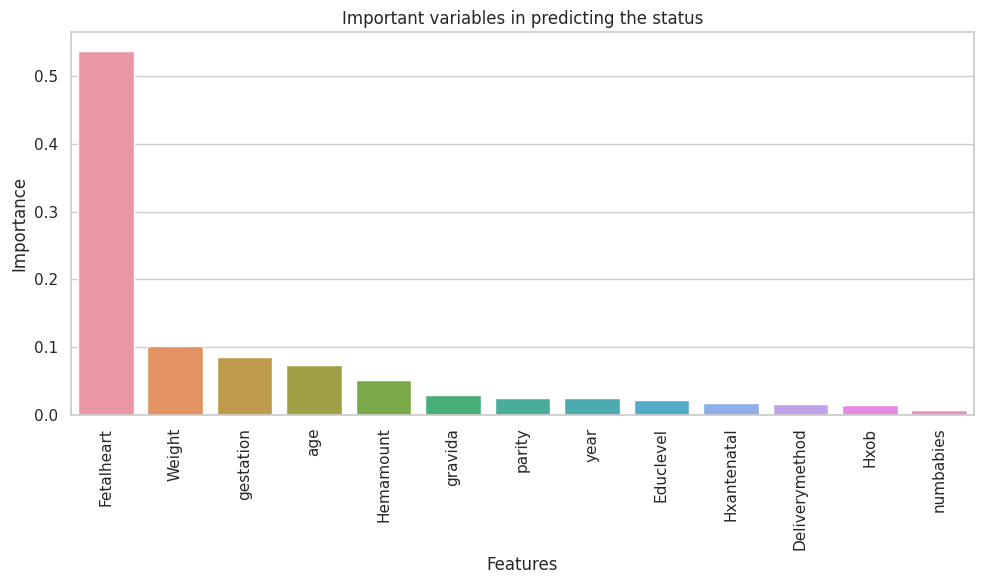

In [21]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='y', y='Importance', data=feature_importance_df)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Important variables in predicting the status')
plt.tight_layout()
plt.show()